# Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cloning yolov5

In [3]:
##clone yolov5
%cd /content/drive/MyDrive/yolofolder
! git clone https://github.com/ultralytics/yolov5.git
%cd /content/drive/MyDrive/yolofolder

/content/drive/MyDrive/yolofolder
Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (10497/10497), done.
/content/drive/MyDrive/yolofolder


## Install the necessary Requirements

In [4]:
%cd /content/drive/MyDrive/yolofolder/yolov5
! pip install -r requirements.txt

/content/drive/MyDrive/yolofolder/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.


## Task:
Annotate the images by using Roboflow

## Training the Model

In [5]:
%cd /content/drive/MyDrive/yolofolder/yolov5

/content/drive/MyDrive/yolofolder/yolov5


In [6]:
pwd

'/content/drive/MyDrive/yolofolder/yolov5'

In [21]:
# training on pre-trained weights


! python train.py --img 320 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 64 --epochs 10 --data nutrisimon.yaml --weights yolov5s.pt --workers 24 --name nutri_defi_yolo

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=nutrisimon.yaml, hyp=hyp.scratch-med.yaml, epochs=10, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=nutri_defi_yolo, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

In [8]:
#!pwd

In [ ]:
!pw

## `Validation`

In [24]:
## validating; validation done by simply runing 'val.py' and specifying trained weight file 
! python val.py --data nutrisimon.yaml --weights /content/drive/MyDrive/yolofolder/yolov5/runs/train/nutri_defi_yolo2/weights/best.pt --name nutri_defi_yolo2

val: data=/content/drive/MyDrive/yolofolder/yolov5/data/nutrisimon.yaml, weights=['/content/drive/MyDrive/yolofolder/yolov5/runs/train/nutri_defi_yolo2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=nutri_defi_yolo2, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolofolder/dataset/labels/test.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.200s exceeded
                 Class     Images  Instances       

## Inference

In [25]:
## inferencing: run 'detect.py' file by specifying 'source' flag to get test dataset path, then weights and 'conf' flag. 'conf' used to set threshold confidence score for testing. 
! python detect.py --source /content/drive/MyDrive/yolofolder/dataset/images/test --weight /content/drive/MyDrive/yolofolder/yolov5/runs/train/nutri_defi_yolo/weights/best.pt --conf 0.35 --name nutri_defi_yolo24 --line-thickness 1

detect: weights=['//content/drive/MyDrive/yolofolder/yolov5/runs/train/nutri_defi_yolo/weights/best.pt'], source=/content/drive/MyDrive/yolofolder/dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=nutri_defi_yolo24, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/14 /content/drive/MyDrive/yolofolder/dataset/images/test/ca0.jpg: 352x640 (no detections), 13.0ms
image 2/14 /content/drive/MyDrive/yolofolder/dataset/images/test/ca18.jpg: 640x480 (no detections), 12.4ms
image 3/14 /content/drive/MyD

In [26]:
from IPython.display import Image  # for displaying images
import random
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

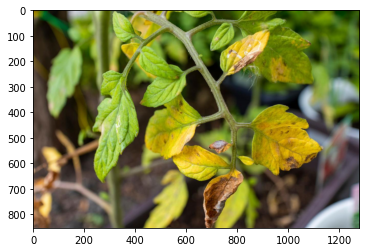

In [27]:
detection_dir = '/content/drive/MyDrive/yolofolder/yolov5/runs/detect/nutri_defi_yolo24'
detected_images = [os.path.join(detection_dir, x) for x in os.listdir(detection_dir)]
rand_img = Image.open(random.choice(detected_images))

img_arr = np.array(rand_img)
plt.imshow(img_arr)

## Inferencing a particular image

In [ ]:
#%cd /content/drive/MyDrive/Intel/TUTS/nutri_defi_yolov5/yolov5
! python detect.py --source /content/Tomato-late-blight-72605cba08f2483aae0fd8f1dc3532a9.jpeg --weight /content/drive/MyDrive/Artificial-Intelligence-Engineer-Training-Material/Module-5-ComputerVision-Part-3/YOLO5-Python-Implementation/yolov5/runs/train/nutri_defi_yolo/weights/best.pt --conf 0.35 --name nutri_defi_yolo822 --line-thickness 1

detect: weights=['/content/drive/MyDrive/Artificial-Intelligence-Engineer-Training-Material/Module-5-ComputerVision-Part-3/YOLO5-Python-Implementation/yolov5/runs/train/nutri_defi_yolo/weights/best.pt'], source=/content/Tomato-late-blight-72605cba08f2483aae0fd8f1dc3532a9.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=nutri_defi_yolo822, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Tomato-late-blight-72605cba08f2483aae0fd8f1dc3532a9.jpeg: 640x448 (no detections), 19.2ms
Speed: 0.5ms pre-proce

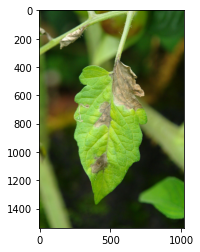

In [ ]:
image = plt.imread('/content/drive/MyDrive/Artificial-Intelligence-Engineer-Training-Material/Module-5-ComputerVision-Part-3/YOLO5-Python-Implementation/yolov5/runs/detect/nutri_defi_yolo8222/Tomato-late-blight-72605cba08f2483aae0fd8f1dc3532a9.jpeg')
plt.imshow(image)
